In [1]:
from pathlib import Path

import pandas as pd
from ast import literal_eval
import seaborn as sns
import tabulate

from typing import List, Tuple, Dict, Optional

In [2]:
from IPython.core.display import display, HTML

# display(HTML("<style>.container { width:100% !important; }</style>"))

# Show all columns and everything inside it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Suppress scientific notation etc.
pd.set_option("display.precision", 2)
pd.options.display.float_format = "{:,.2f}".format

/tmp/ipykernel_604690/1001000681.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
%load_ext jupyter_black

In [8]:
# Path to clean metadata file
CSV_PATH = Path("../../data/metadata_complete.csv")

In [9]:
df = pd.read_csv(CSV_PATH)
# Drop old columns with errors, there should be none there
# df.drop(columns=["error", "exception_text"], inplace=True)
df.head()

,doc_path,num_pages,metadata,txt_file,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,langs_raw,langs_small,token_len,sentence_len,tokens_per_page,langs_raw_extracted,langs_list,GERMAN,PORTUGUESE,DUTCH,FRENCH,ENGLISH,NYNORSK,SPANISH,ITALIAN,EN_DE,OTHER,num_repl_chars,repl_chars_ratio,ISIN,country,pdf_only,language,delete_completely,no_txt,is_empty
0,/home/sh/hsa/papers/dataset/extracted/Final_terms/Country_of_origin_DE/lang_DE_EN/DE000HLB7C13.pdf,19,"{'format': 'PDF 1.4', 'title': 'EA', 'author': 'Helaba', 'subject': '', 'keywords': '', 'creator': 'Structured Products Database (SPD)', 'producer': '3-Heights(TM) PDF Producer 4.4.43.1 (http://www.pdf-tools.com)', 'creationDate': ""D:20221229153146+01'00'"", 'modDate': ""D:20230106125609+01'00'"", 'trapped': '', 'encryption': None}",/tmp/FULL_CLI/Final_terms/DE000HLB7C13.pdf.txt,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000HLB7C13.pdf,Final_terms/DE000HLB7C13.pdf.txt,Final_terms,"54,319.00","8,365.00",340.00,"Counter({'GERMAN': 0.9822987680899414, 'PORTUGUESE': 0.004903719650759478, 'DUTCH': 0.004066499222581031, 'FRENCH': 0.003588087549336204, 'ENGLISH': 0.0028704700394689632, 'NYNORSK': 0.001076426264800861, 'SPANISH': 0.0008372204281784475, 'ITALIAN': 0.0003588087549336204})","{'GERMAN': 0.9873767732628036, 'PORTUGUESE': 0.004929069487857658, 'DUTCH': 0.004087521038711229, 'FRENCH': 0.0036066362106275548}",6.49,24.60,440.26,"{'GERMAN': 0.9822987680899414, 'PORTUGUESE': 0.004903719650759478, 'DUTCH': 0.004066499222581031, 'FRENCH': 0.003588087549336204, 'ENGLISH': 0.0028704700394689632, 'NYNORSK': 0.001076426264800861, 'SPANISH': 0.0008372204281784475, 'ITALIAN': 0.0003588087549336204}","{'GERMAN': 0.9822987680899414, 'PORTUGUESE': 0.004903719650759478, 'DUTCH': 0.004066499222581031, 'FRENCH': 0.003588087549336204, 'ENGLISH': 0.0028704700394689632, 'NYNORSK': 0.001076426264800861, 'SPANISH': 0.0008372204281784475, 'ITALIAN': 0.0003588087549336204}",0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,DE000HLB7C13,DE,False,DE,False,False,NaN
1,/home/sh/hsa/papers/dataset/extracted/Final_terms/Country_of_origin_DE/lang_DE_EN/DE000NWB2ME7.pdf,14,"{'format': 'PDF 1.6', 'title': '', 'author': 'Schulz, Hartmut', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDate': ""D:20200513175357+02'00'"", 'modDate': ""D:20200526104335+02'00'"", 'trapped': '', 'encryption': None}",/tmp/FULL_CLI/Final_terms/DE000NWB2ME7.pdf.txt,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000NWB2ME7.pdf,Final_terms/DE000NWB2ME7.pdf.txt,Final_terms,"23,605.00","4,354.00",183.00,"Counter({'ENGLISH': 0.45957740009186954, 'GERMAN': 0.45728066146072577, 'FRENCH': 0.02939825447864033, 'PORTUGUESE': 0.01515847496554892, 'DUTCH': 0.0133210840606339, 'SPANISH': 0.010794671566375747, 'NYNORSK': 0.009875976113918236, 'ITALIAN': 0.004593477262287551})","{'ENGLISH': 0.47802197802197804, 'GERMAN': 0.4756330625895843, 'FRENCH': 0.030578117534639272, 'PORTUGUESE': 0.015766841853798376}",5.42,23.79,311.00,"{'ENGLISH': 0.45957740009186954, 'GERMAN': 0.45728066146072577, 'FRENCH': 0.02939825447864033, 'PORTUGUESE': 0.01515847496554892, 'DUTCH': 0.0133210840606339, 'SPANISH': 0.010794671566375747, 'NYNORSK': 0.009875976113918236, 'ITALIAN': 0.004593477262287551}","{'ENGLISH': 0.45957740009186954, 'GERMAN': 0.45728066146072577, 'FRENCH': 0.02939825447864033, 'PORTUGUESE': 0.01515847496554892, 'DUTCH': 0.0133210840606339, 'SPANISH': 0.010794671566375747, 'NYNORSK': 0.009875976113918236, 'ITALIAN': 0.004593477262287551}",0.46,0.02,0.01,0.03,0.46,0.01,0.01,0.00,0.92,0.08,0.00,0.00,DE000NWB2ME7,DE,False,"EN,DE",False,False,NaN
2,/home/sh/hsa/papers/dataset/extracted/Final_terms/Country_of_origin_DE/lang_DE_EN/DE000DFK0TS8.pdf,25,"{'format': 'PDF 1.5', 'title': '', 'author': 'Heimann, Rolf', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDate': ""D:20220701165246+02'00'"", 'modDate': ""D

In [13]:
# Create some interesting shortcuts for column names

# Languages
MAIN_LANG_COLS = ["ENGLISH", "GERMAN"]
OTHER_LANG_COLS = [
    "PORTUGUESE",
    "DUTCH",
    "FRENCH",
    "NYNORSK",
    "SPANISH",
    "ITALIAN",
]
LANG_COLS = OTHER_LANG_COLS + MAIN_LANG_COLS
SPECIAL_LANG_COLS = ["EN_DE", "OTHER"]

"""
# Stats
SPACY_STATS_COLS = ["num_tokens", "num_sentences"]
PDF_STATS_COLS = ["num_pages", "collection"]
STATS_COLS = ["token_len", "sentence_len", "tokens_per_page"]
"""

# Filenames
FN_COLS = ["txt_fn", "source_fn"]

for i in [
    LANG_COLS,
    # STATS_COLS,
    # SPACY_STATS_COLS,
    FN_COLS,
    # PDF_STATS_COLS,
]:
    for c in i:
        assert c in list(df.columns), c

INTERESTING_COLS = SPECIAL_LANG_COLS + FN_COLS + LANG_COLS

# Column names we'll be using often
KEY_MONTHLY = "Monthly_reports_BB"
KEY_FT = "Final_terms"

In [14]:
# We care only about the rows we decided to include in the final collection, AND we decided that BB monthly reports are special
# So we analyze the rest
dfl = df[(df.collection != KEY_MONTHLY) & (df.pdf_only == False)]
dfl

,doc_path,num_pages,metadata,txt_file,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,langs_raw,langs_small,token_len,sentence_len,tokens_per_page,langs_raw_extracted,langs_list,GERMAN,PORTUGUESE,DUTCH,FRENCH,ENGLISH,NYNORSK,SPANISH,ITALIAN,EN_DE,OTHER,num_repl_chars,repl_chars_ratio,ISIN,country,pdf_only,language,delete_completely,no_txt,is_empty
0,/home/sh/hsa/papers/dataset/extracted/Final_terms/Country_of_origin_DE/lang_DE_EN/DE000HLB7C13.pdf,19,"{'format': 'PDF 1.4', 'title': 'EA', 'author': 'Helaba', 'subject': '', 'keywords': '', 'creator': 'Structured Products Database (SPD)', 'producer': '3-Heights(TM) PDF Producer 4.4.43.1 (http://www.pdf-tools.com)', 'creationDate': ""D:20221229153146+01'00'"", 'modDate': ""D:20230106125609+01'00'"", 'trapped': '', 'encryption': None}",/tmp/FULL_CLI/Final_terms/DE000HLB7C13.pdf.txt,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000HLB7C13.pdf,Final_terms/DE000HLB7C13.pdf.txt,Final_terms,"54,319.00","8,365.00",340.00,"Counter({'GERMAN': 0.9822987680899414, 'PORTUGUESE': 0.004903719650759478, 'DUTCH': 0.004066499222581031, 'FRENCH': 0.003588087549336204, 'ENGLISH': 0.0028704700394689632, 'NYNORSK': 0.001076426264800861, 'SPANISH': 0.0008372204281784475, 'ITALIAN': 0.0003588087549336204})","{'GERMAN': 0.9873767732628036, 'PORTUGUESE': 0.004929069487857658, 'DUTCH': 0.004087521038711229, 'FRENCH': 0.0036066362106275548}",6.49,24.60,440.26,"{'GERMAN': 0.9822987680899414, 'PORTUGUESE': 0.004903719650759478, 'DUTCH': 0.004066499222581031, 'FRENCH': 0.003588087549336204, 'ENGLISH': 0.0028704700394689632, 'NYNORSK': 0.001076426264800861, 'SPANISH': 0.0008372204281784475, 'ITALIAN': 0.0003588087549336204}","{'GERMAN': 0.9822987680899414, 'PORTUGUESE': 0.004903719650759478, 'DUTCH': 0.004066499222581031, 'FRENCH': 0.003588087549336204, 'ENGLISH': 0.0028704700394689632, 'NYNORSK': 0.001076426264800861, 'SPANISH': 0.0008372204281784475, 'ITALIAN': 0.0003588087549336204}",0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,DE000HLB7C13,DE,False,DE,False,False,NaN
1,/home/sh/hsa/papers/dataset/extracted/Final_terms/Country_of_origin_DE/lang_DE_EN/DE000NWB2ME7.pdf,14,"{'format': 'PDF 1.6', 'title': '', 'author': 'Schulz, Hartmut', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDate': ""D:20200513175357+02'00'"", 'modDate': ""D:20200526104335+02'00'"", 'trapped': '', 'encryption': None}",/tmp/FULL_CLI/Final_terms/DE000NWB2ME7.pdf.txt,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000NWB2ME7.pdf,Final_terms/DE000NWB2ME7.pdf.txt,Final_terms,"23,605.00","4,354.00",183.00,"Counter({'ENGLISH': 0.45957740009186954, 'GERMAN': 0.45728066146072577, 'FRENCH': 0.02939825447864033, 'PORTUGUESE': 0.01515847496554892, 'DUTCH': 0.0133210840606339, 'SPANISH': 0.010794671566375747, 'NYNORSK': 0.009875976113918236, 'ITALIAN': 0.004593477262287551})","{'ENGLISH': 0.47802197802197804, 'GERMAN': 0.4756330625895843, 'FRENCH': 0.030578117534639272, 'PORTUGUESE': 0.015766841853798376}",5.42,23.79,311.00,"{'ENGLISH': 0.45957740009186954, 'GERMAN': 0.45728066146072577, 'FRENCH': 0.02939825447864033, 'PORTUGUESE': 0.01515847496554892, 'DUTCH': 0.0133210840606339, 'SPANISH': 0.010794671566375747, 'NYNORSK': 0.009875976113918236, 'ITALIAN': 0.004593477262287551}","{'ENGLISH': 0.45957740009186954, 'GERMAN': 0.45728066146072577, 'FRENCH': 0.02939825447864033, 'PORTUGUESE': 0.01515847496554892, 'DUTCH': 0.0133210840606339, 'SPANISH': 0.010794671566375747, 'NYNORSK': 0.009875976113918236, 'ITALIAN': 0.004593477262287551}",0.46,0.02,0.01,0.03,0.46,0.01,0.01,0.00,0.92,0.08,0.00,0.00,DE000NWB2ME7,DE,False,"EN,DE",False,False,NaN
2,/home/sh/hsa/papers/dataset/extracted/Final_terms/Country_of_origin_DE/lang_DE_EN/DE000DFK0TS8.pdf,25,"{'format': 'PDF 1.5', 'title': '', 'author': 'Heimann, Rolf', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDate': ""D:20220701165246+02'00'"", 'modDate': ""D

In [19]:
# dfl = dfl.rename(columns={"EN_DE": "EN/DE"})

/home/sh/hsa/papers/german-financial-dataset/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sh/hsa/papers/german-financial-dataset/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sh/hsa/papers/german-financial-dataset/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sh/hsa/papers/german-financial-dataset/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1

<Axes: >

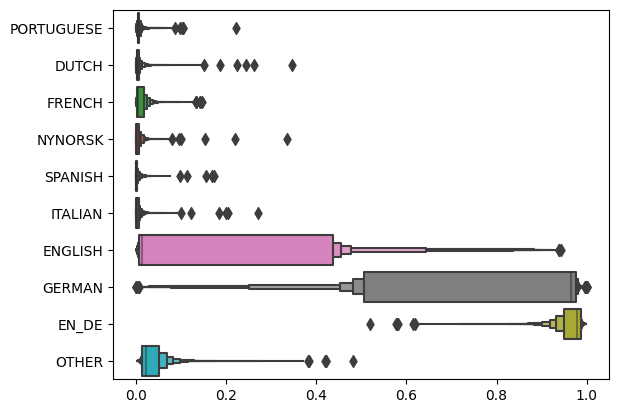

In [15]:
sns.boxenplot(dfl[LANG_COLS + SPECIAL_LANG_COLS], orient="h")

In [20]:
# Getting the 'main' language is easy
dfl[LANG_COLS].apply(lambda x: x.idxmax(), axis=1)

0         GERMAN
1        ENGLISH
2         GERMAN
3         GERMAN
4         GERMAN
          ...   
12411     GERMAN
12412     GERMAN
12413     GERMAN
12415     GERMAN
12416     GERMAN
Length: 10737, dtype: object

In [21]:
def ml_as_df(l: pd.Series):
    """Given a Series of languages, mask their names as 1-2-X"""
    l3 = list(l.items())  # List of tuples
    nl = ((l3.index(x), x[1]) for x in l3)
    return pd.Series(nl)


def prep_stat_langs(row: pd.Series):
    """Given a row, returns the main three languages as columns named 0,1,2"""
    langs = row[LANG_COLS].astype(float)
    main_langs = langs.nlargest(3)
    masked = ml_as_df(main_langs)
    rd = {x[0]: x[1] for x in masked}
    return rd

In [22]:
# We take the most frequent languages of a doc and add as three numbered columns
langs_df = pd.json_normalize(dfl[LANG_COLS].apply(lambda x: prep_stat_langs(x), axis=1))
dfl = dfl.reset_index().join(langs_df)
dfl

,index,doc_path,num_pages,metadata,txt_file,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,langs_raw,langs_small,token_len,sentence_len,tokens_per_page,langs_raw_extracted,langs_list,GERMAN,PORTUGUESE,DUTCH,FRENCH,ENGLISH,NYNORSK,SPANISH,ITALIAN,EN_DE,OTHER,num_repl_chars,repl_chars_ratio,ISIN,country,pdf_only,language,delete_completely,no_txt,is_empty,0,1,2
0,0,/home/sh/hsa/papers/dataset/extracted/Final_terms/Country_of_origin_DE/lang_DE_EN/DE000HLB7C13.pdf,19,"{'format': 'PDF 1.4', 'title': 'EA', 'author': 'Helaba', 'subject': '', 'keywords': '', 'creator': 'Structured Products Database (SPD)', 'producer': '3-Heights(TM) PDF Producer 4.4.43.1 (http://www.pdf-tools.com)', 'creationDate': ""D:20221229153146+01'00'"", 'modDate': ""D:20230106125609+01'00'"", 'trapped': '', 'encryption': None}",/tmp/FULL_CLI/Final_terms/DE000HLB7C13.pdf.txt,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000HLB7C13.pdf,Final_terms/DE000HLB7C13.pdf.txt,Final_terms,"54,319.00","8,365.00",340.00,"Counter({'GERMAN': 0.9822987680899414, 'PORTUGUESE': 0.004903719650759478, 'DUTCH': 0.004066499222581031, 'FRENCH': 0.003588087549336204, 'ENGLISH': 0.0028704700394689632, 'NYNORSK': 0.001076426264800861, 'SPANISH': 0.0008372204281784475, 'ITALIAN': 0.0003588087549336204})","{'GERMAN': 0.9873767732628036, 'PORTUGUESE': 0.004929069487857658, 'DUTCH': 0.004087521038711229, 'FRENCH': 0.0036066362106275548}",6.49,24.60,440.26,"{'GERMAN': 0.9822987680899414, 'PORTUGUESE': 0.004903719650759478, 'DUTCH': 0.004066499222581031, 'FRENCH': 0.003588087549336204, 'ENGLISH': 0.0028704700394689632, 'NYNORSK': 0.001076426264800861, 'SPANISH': 0.0008372204281784475, 'ITALIAN': 0.0003588087549336204}","{'GERMAN': 0.9822987680899414, 'PORTUGUESE': 0.004903719650759478, 'DUTCH': 0.004066499222581031, 'FRENCH': 0.003588087549336204, 'ENGLISH': 0.0028704700394689632, 'NYNORSK': 0.001076426264800861, 'SPANISH': 0.0008372204281784475, 'ITALIAN': 0.0003588087549336204}",0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,DE000HLB7C13,DE,False,DE,False,False,NaN,0.98,0.00,0.00
1,1,/home/sh/hsa/papers/dataset/extracted/Final_terms/Country_of_origin_DE/lang_DE_EN/DE000NWB2ME7.pdf,14,"{'format': 'PDF 1.6', 'title': '', 'author': 'Schulz, Hartmut', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDate': ""D:20200513175357+02'00'"", 'modDate': ""D:20200526104335+02'00'"", 'trapped': '', 'encryption': None}",/tmp/FULL_CLI/Final_terms/DE000NWB2ME7.pdf.txt,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000NWB2ME7.pdf,Final_terms/DE000NWB2ME7.pdf.txt,Final_terms,"23,605.00","4,354.00",183.00,"Counter({'ENGLISH': 0.45957740009186954, 'GERMAN': 0.45728066146072577, 'FRENCH': 0.02939825447864033, 'PORTUGUESE': 0.01515847496554892, 'DUTCH': 0.0133210840606339, 'SPANISH': 0.010794671566375747, 'NYNORSK': 0.009875976113918236, 'ITALIAN': 0.004593477262287551})","{'ENGLISH': 0.47802197802197804, 'GERMAN': 0.4756330625895843, 'FRENCH': 0.030578117534639272, 'PORTUGUESE': 0.015766841853798376}",5.42,23.79,311.00,"{'ENGLISH': 0.45957740009186954, 'GERMAN': 0.45728066146072577, 'FRENCH': 0.02939825447864033, 'PORTUGUESE': 0.01515847496554892, 'DUTCH': 0.0133210840606339, 'SPANISH': 0.010794671566375747, 'NYNORSK': 0.009875976113918236, 'ITALIAN': 0.004593477262287551}","{'ENGLISH': 0.45957740009186954, 'GERMAN': 0.45728066146072577, 'FRENCH': 0.02939825447864033, 'PORTUGUESE': 0.01515847496554892, 'DUTCH': 0.0133210840606339, 'SPANISH': 0.010794671566375747, 'NYNORSK': 0.009875976113918236, 'ITALIAN': 0.004593477262287551}",0.46,0.02,0.01,0.03,0.46,0.01,0.01,0.00,0.92,0.08,0.00,0.00,DE000NWB2ME7,DE,False,"EN,DE",False,False,NaN,0.46,0.46,0.03
2,2,/home/sh/hsa/papers/dataset/extracted/Final_terms/Country_of_origin_DE/lang_DE_EN/DE000DFK0TS8.pdf,25,"{'format': 'PDF 1.5', 'title': '', 'author': 'Heimann, Rolf', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDa

In [23]:
dfl[[0, 1, 2]].describe()

,0,1,2
count,"10,737.00","10,737.00","10,737.00"
mean,0.83,0.13,0.01
std,0.21,0.19,0.01
min,0.31,0.00,0.00
25%,0.60,0.01,0.00
50%,0.96,0.02,0.01
75%,0.98,0.36,0.02
max,1.00,0.49,0.22


/home/sh/hsa/papers/german-financial-dataset/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sh/hsa/papers/german-financial-dataset/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sh/hsa/papers/german-financial-dataset/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sh/hsa/papers/german-financial-dataset/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1

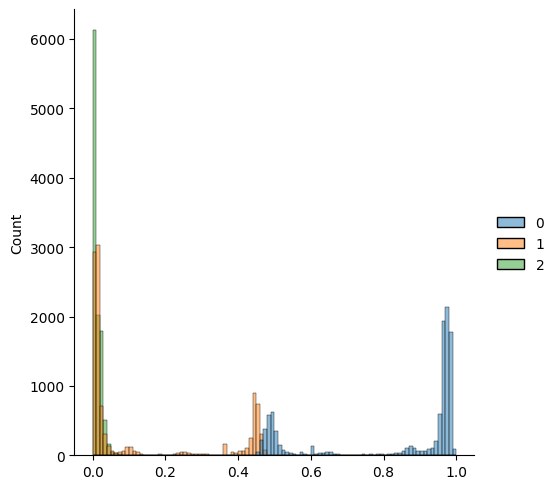

In [24]:
sns.displot(dfl[[0, 1, 2]], bins=100)

In [222]:
dfl.sort_values(2)

,index,num_pages,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page,GERMAN,PORTUGUESE,DUTCH,FRENCH,ENGLISH,NYNORSK,SPANISH,ITALIAN,ENDE,THEREST,num_repl_chars,repl_chars_ratio,ISIN,country,pdf_only,0,1,2
5446,6295,3,Basisprospekte/country_of_origin_DE/lang_DE/nachtrag_vom_24_092015_1021.pdf,Basisprospekte/nachtrag_vom_24_092015_1021.pdf.txt,Basisprospekte,3383,591,15,5.72,39.40,197.00,0.96,0.00,0.00,0.00,0.04,0.00,0.00,0.00,1.00,0.00,0,0.00,NaN,NaN,False,0.96,0.04,0.00
6075,7022,2,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000SLB5557.pdf,Final_terms/DE000SLB5557.pdf.txt,Final_terms,6578,1072,62,6.14,17.29,536.00,0.99,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.99,0.01,26,0.00,DE000SLB5557,DE,False,0.99,0.01,0.00
3208,3692,3,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000A2TSCU0.pdf,Final_terms/DE000A2TSCU0.pdf.txt,Final_terms,7463,1179,59,6.33,19.98,393.00,0.99,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0,0.00,DE000A2TSCU0,DE,False,0.99,0.01,0.00
69,80,2,Brochures_and_InfoMaterials/Country_of_origin_DE/lang_DE/sammel-niko-bedingungen-data.pdf,Brochures_and_InfoMaterials/sammel-niko-bedingungen-data.pdf.txt,Brochures_and_InfoMaterials,4383,706,22,6.21,32.09,353.00,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0,0.00,NaN,NaN,False,0.99,0.01,0.00
6135,7087,1,Law/Gesetze_DE/SStellV-VVG.pdf,Law/SStellV-VVG.pdf.txt,Law,1216,213,13,5.71,16.38,213.00,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0,0.00,NaN,NaN,False,0.99,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,9998,59,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000HSH5Z44.pdf,Final_terms/DE000HSH5Z44.pdf.txt,Final_terms,167511,26936,915,6.22,29.44,456.54,0.29,0.02,0.01,0.01,0.33,0.00,0.16,0.18,0.62,0.38,0,0.00,DE000HSH5Z44,DE,False,0.33,0.29,0.18
1913,2197,14,Brochures_and_InfoMaterials/Country_of_origin_DE/lang_DE/emissionskalender-jahresvorausschau-data.pdf,Brochures_and_InfoMaterials/emissionskalender-jahresvorausschau-data.pdf.txt,Brochures_and_InfoMaterials,22923,4974,171,4.61,29.09,355.29,0.57,0.22,0.19,0.00,0.00,0.00,0.00,0.01,0.58,0.42,0,0.00,NaN,NaN,False,0.57,0.22,0.19
3496,4024,65,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000A13SWE6.pdf,Final_terms/DE000A13SWE6.pdf.txt,Final_terms,210745,38301,2044,5.50,18.74,589.25,0.26,0.02,0.01,0.01,0.32,0.00,0.17,0.20,0.58,0.42,0,0.00,DE000A13SWE6,DE,False,0.32,0.26,0.20
9695,11231,21,Final_terms/Country_of_origin_DE/lang_DE_EN/DE000DK0EW14.pdf,Final_terms/DE000DK0EW14.pdf.txt,Final_terms,58780,9495,511,6.19,18.58,452.14,0.27,0.02,0.01,0.01,0.31,0.00,0.17,0.20,0.58,0.42,0,0.00,DE000DK0EW14,DE,False,0.31,0.27,0.20


Manually looking at some of the documents with highest third language (~20%), we see that they all are actually language identification issues! This means we have TWO cases only!

And we know what our three languages are: we deleted all English-only ones, so it's either DE or DE+EN

In [236]:
def parse_languages(row: pd.Series, lang_cols=LANG_COLS, threshold: float = 0.8):
    """
    Given a row, return either a single, or a comma-separated list of languages contained therein,
    parsing the language %s.
    """
    # Get languages from row
    langs = row[lang_cols].astype(float)
    # 2 main ones
    mlangs = list(langs[lang_cols].nlargest(2).items())

    # Most frequent language
    ml_name, ml_perc = mlangs[0]

    if ml_perc > threshold:
        # One language only
        return ml_name
    else:
        return ",".join(sorted([x[0] for x in mlangs]))


parse_languages(dfl.iloc[0])

'GERMAN'

In [238]:
dfl.iloc[:30].apply(parse_languages, axis=1)

0             GERMAN
1     ENGLISH,GERMAN
2     ENGLISH,GERMAN
3             GERMAN
4             GERMAN
5     ENGLISH,GERMAN
6             GERMAN
7     ENGLISH,GERMAN
8             GERMAN
9     ENGLISH,GERMAN
10            GERMAN
11    ENGLISH,GERMAN
12            GERMAN
13            GERMAN
14            GERMAN
15            GERMAN
16            GERMAN
17            GERMAN
18            GERMAN
19            GERMAN
20    ENGLISH,GERMAN
21    ENGLISH,GERMAN
22            GERMAN
23            GERMAN
24            GERMAN
25    ENGLISH,GERMAN
26            GERMAN
27            GERMAN
28    ENGLISH,GERMAN
29    ENGLISH,GERMAN
dtype: object